<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

# 과제: 고객 신용도 예측


<img src = "https://github.com/Jangrae/img/blob/master/credit-card.jpg?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 코드 셀에는 주석을 충분히 답니다.
- 마크다운 셀을 사용해 작업 한 내용을 충분히 설명합니다.
- 입력을 요구한 (의견) 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 다양한 방법으로 데이터를 탐색하고 결과를 정리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.
- 더 나은 성능을 보이도록 특정 모델을 튜닝합니다.

**3) 데이터 정보**

<img src = "https://github.com/Jangrae/img/blob/master/credit.png?raw=true" width=550 align="left"/>

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [116]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [117]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/credit_NA.csv'
path = 'https://bit.ly/CreditFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

## 2.1.기본 정보 확인

- 데이터에 대한 기본 정보를 우선 확인합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [118]:
# 데이터 헤드 확인
data.head()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.0,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.0,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.0,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,NaN,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.0,2,1,4,2,1


In [119]:
# 데이터 테일 확인
data.tail()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
995,1,1,12,2,3,1680,5,4,1,1,35.0,2,1,3,1,1
996,1,1,42,2,2,7882,4,3,4,2,45.0,3,1,3,1,1
997,0,2,54,0,9,15945,2,3,4,4,58.0,1,1,3,2,1
998,1,2,15,4,3,1537,5,3,4,1,50.0,2,2,3,2,1
999,0,3,12,2,0,1386,3,2,2,2,26.0,2,1,3,1,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [120]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Creditability   1000 non-null   int64  
 1   AccountBalance  1000 non-null   int64  
 2   CreditDuration  1000 non-null   int64  
 3   Payment         1000 non-null   int64  
 4   Purpose         1000 non-null   int64  
 5   CreditAmount    1000 non-null   int64  
 6   Employment      1000 non-null   int64  
 7   SexMarital      1000 non-null   int64  
 8   CurrentAddress  1000 non-null   int64  
 9   MostValuable    1000 non-null   int64  
 10  Age             983 non-null    float64
 11  ApartmentType   1000 non-null   int64  
 12  NoCredits       1000 non-null   int64  
 13  Occupation      1000 non-null   int64  
 14  Telephone       1000 non-null   int64  
 15  ForeignWorker   1000 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 125.1 KB


* 1 == 신용도 좋음, 0 == 신용도 나쁨

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [121]:
# 기초통계정보 조회
data.describe()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,983.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.54500,2.828000,3271.24800,3.384000,2.68200,2.845000,2.358000,35.495422,1.928000,1.407000,2.904000,1.404000,1.037000
std,0.458487,0.835589,12.058814,1.08312,2.744439,2822.75176,1.208306,0.70808,1.103718,1.050209,11.302980,0.530186,0.577654,0.653614,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,3.000000,2.00000,2.000000,1.000000,27.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,3.000000,3.00000,3.000000,2.000000,33.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,4.00000,3.000000,3972.25000,5.000000,3.00000,4.000000,3.000000,42.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,4.000000,2.000000,2.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [122]:
# 결측치 확인
data.isnull().sum()

Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
ApartmentType      0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

* 연령대 값에 결측치가 있음 - 결측치 처리 필요

## 2.2.데이터 상세 확인(5가지 이상 추가)

- 데이터를 **충분히 이해할 수 있도록** 집계와 시각화를 통해 살펴봅니다.
- 이후 모델링을 진행해야 하니 분석에 너무 많은 시간을 할애해서는 안됩니다.
- 분석 결과를 관련 코드 셀 아래에 정리합니다.

**1) Target 값 분포 확인**

- Target 변수인 Creditability 변수의 값 분포를 확인합니다.

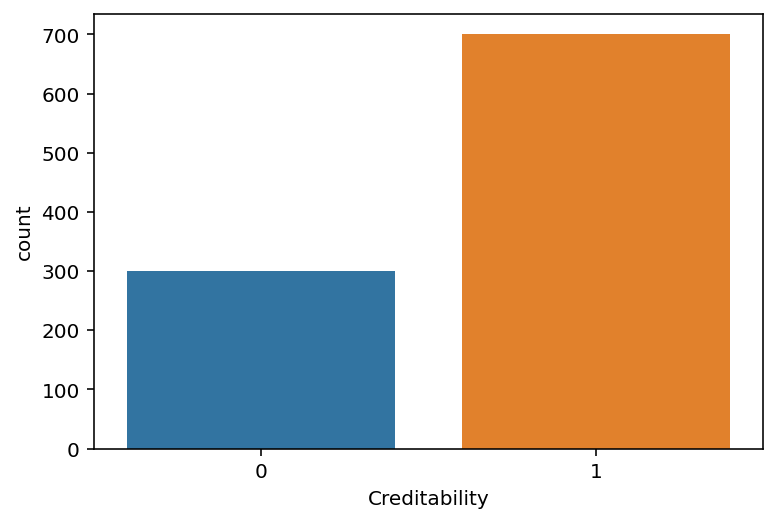

In [123]:
# 변수 지정
target = 'Creditability'

# target 분포 확인(시각화)
sns.countplot(data[target])
plt.show()

- (의견) 신용도가 나쁜 사람들이 차지하는 비중이 적지 않은 것 같다.
- (의견) 모델링 할 때 표본 수 차이가 나서 민감도 또는 정밀도가 낮아질 것 같다.
- (의견) 신용도가 나쁜 사람들은 어떤 특징을 가지는지 알 필요가 있다.

**2) 변수 구분**

- Target 변수(Creditability)를 제외한 변수를 범주형과 연속형으로 구분해 목륵을 정리합니다.
- 목록 개수는 필요한 만큼 늘려 사용합니다.

- 범주형 변수 (가변수화 대상)
    -   AccountBalance
    -   Payment
    -   Purpose
    -   Employment
    -   SexMarital
    -   CurrentAddress
    -   MostValueable
    -   ApartmentType
    -   NoCredits
    -   Occupation
    -   Telephone
    -   ForeignWorker

- 연속형 변수 (정규화 대상)
    -  CreditDuration
    -  CreditAmount
    -  Age

**3) 범주형 변수 확인**

- Target 변수(Creditability)를 제외한 범주형 변수의 범주값과 그 값의 개수를 확인합니다.
- 참고: 대상 변수를 리스트로 선언하고 반복문을 수행해 확인하면 편리합니다.

In [124]:
# 변수 선언
Balance = 'AccountBalance'
Payment = 'Payment'
Purpose = 'Purpose'
Employstatus = 'Employment'
Marry = 'SexMarital'
Livelong = 'CurrentAddress'
Valuable = 'MostValuable'
Apartment = 'ApartmentType'
Credits = 'NoCredits'
Job = 'Occupation'
Phone = 'Telephone'
Foreigner = 'ForeignWorker'

# 범주형 변수 확인

print(data[Account].value_counts())
print('='*30)
print(data[Payment].value_counts())
print('='*30)
print(data[Employstatus].value_counts())
print('='*30)
print(data[Marry].value_counts())
print('='*30)
print(data[Livelong].value_counts())
print('='*30)
print(data[Valuable].value_counts())
print('='*30)
print(data[Apartment].value_counts())
print('='*30)
print(data[Credits].value_counts())
print('='*30)
print(data[Job].value_counts())
print('='*30)
print(data[Phone].value_counts())
print('='*30)
print(data[Foreigner].value_counts())
print('='*30)

3    457
1    274
2    269
Name: AccountBalance, dtype: int64
2    530
4    293
3     88
1     49
0     40
Name: Payment, dtype: int64
3    339
5    253
4    174
2    172
1     62
Name: Employment, dtype: int64
3    548
2    310
4     92
1     50
Name: SexMarital, dtype: int64
4    413
2    308
3    149
1    130
Name: CurrentAddress, dtype: int64
3    332
1    282
2    232
4    154
Name: MostValuable, dtype: int64
2    714
1    179
3    107
Name: ApartmentType, dtype: int64
1    633
2    333
3     28
4      6
Name: NoCredits, dtype: int64
3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64
1    596
2    404
Name: Telephone, dtype: int64
1    963
2     37
Name: ForeignWorker, dtype: int64


- (의견) 경제적으로 어느 정도 안정권에 있는 사람들이 대부분이다.
- (의견) 다만 대출을 많이 끼고 있는 사람들이 있어서 이들이 단기적으로 경제적 기반에 문제가 생길 경우(실업 등) 상환 및 신용 유지를 어떻게 할지에 대한 분석이 필요하다.

**4) 연속형 범주 분석**

- Creditability를 제외한 연속형 범주 조사

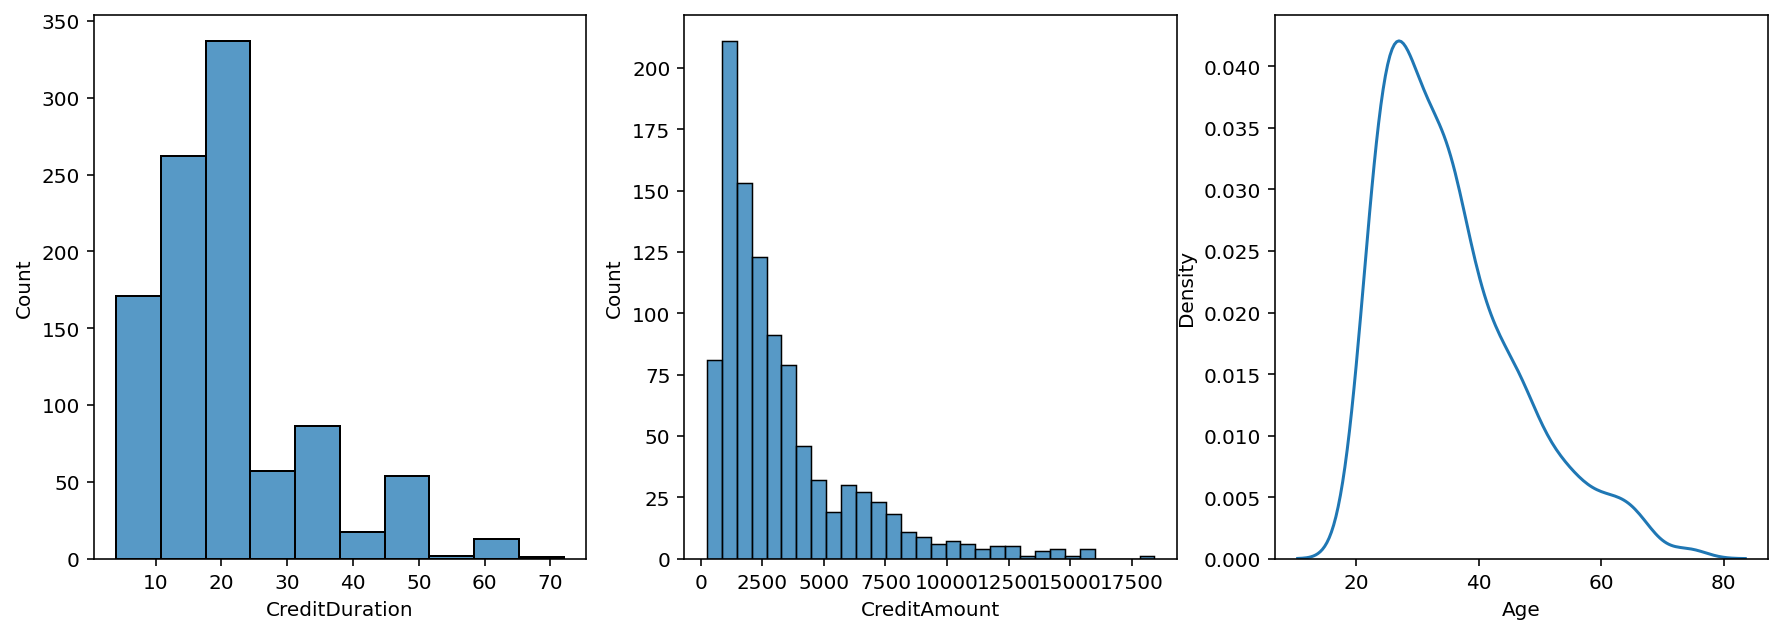

In [125]:
# 변수 선언
Duration = 'CreditDuration'
Amount = 'CreditAmount'
Age = 'Age'

# 범주형 변수 확인(시각화)
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.histplot(data=data, x=Duration, bins=10)
plt.subplot(1,3,2)
sns.histplot(data=data, x=Amount, bins=30)
plt.subplot(1,3,3)
sns.kdeplot(data=data, x=Age)
plt.show()

- (의견) 대출 신청 기간 및 금액별로 신용도가 달라지는지 알아볼 필요가 있다.
- (의견) 젊은 사람들이 주택 구매를 목적으로 대출하는 경우가 많은 것 같다.

**5) 상관관계 조사**

- 데이터 간 상관관계 조사

In [126]:
# 상관관계 조사
data.corr()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
Creditability,1.000000,0.339409,-0.214927,0.228785,-0.017979,-0.154740,0.116002,0.088184,-0.002967,-0.142612,0.088471,0.018119,0.045732,-0.032735,0.036466,0.082079
AccountBalance,0.339409,1.000000,-0.071254,0.171727,0.047787,-0.041161,0.088960,0.037549,-0.064727,-0.030244,0.053994,0.029771,0.059144,0.030366,0.063609,-0.036607
CreditDuration,-0.214927,-0.071254,1.000000,-0.077186,0.147492,0.624988,0.057381,0.014789,0.034067,0.303971,-0.034400,0.153126,-0.011284,0.210910,0.164718,-0.134680
Payment,0.228785,0.171727,-0.077186,1.000000,-0.090336,-0.059915,0.138225,0.042171,0.063198,-0.053777,0.138391,0.061428,0.437066,0.010350,0.052370,0.028554
Purpose,-0.017979,0.047787,0.147492,-0.090336,1.000000,0.068480,0.016013,0.000157,-0.038221,0.010966,-0.007611,0.013495,0.054935,0.008085,0.078371,-0.113244
CreditAmount,-0.154740,-0.041161,0.624988,-0.059915,0.068480,1.000000,-0.008376,-0.016094,0.028917,0.311602,0.038014,0.133024,0.020785,0.285393,0.277000,-0.030662
Employment,0.116002,0.088960,0.057381,0.138225,0.016013,-0.008376,1.000000,0.111278,0.245081,0.087187,0.264133,0.115077,0.125791,0.101225,0.060518,-0.022845
SexMarital,0.088184,0.037549,0.014789,0.042171,0.000157,-0.016094,0.111278,1.000000,-0.027269,-0.006940,0.004510,0.098934,0.064672,-0.011956,0.027275,0.073103
CurrentAddress,-0.002967,-0.064727,0.034067,0.063198,-0.038221,0.028917,0.245081,-0.027269,1.000000,0.147231,0.269394,0.009990,0.089625,0.012655,0.095359,-0.039691
MostValuable,-0.142612,-0.030244,0.303971,-0.053777,0.010966,0.311602,0.087187,-0.006940,0.147231,1.000000,0.078384,0.342969,-0.007765,0.276149,0.196802,-0.132462


- (의견) 계좌 소유 여부, 신청한 대출 기간 및 금액, 대출 목적, 과거 대출 납입 상태, 직업이 신용과 큰 상관관계를 가지고 있다.
- (의견) 자산 관리를 하면서 대출할 때 명확한 목적을 갖고 필요한 만큼만 하는 사람들이 신용도가 높을 것 같다.

**6) 이변량 분석(1)**

- 5번 항목에서 큰 상관관계가 있다고 판단한 항목(상관계수 0.1 이상)에 대한 Creditability와의 이변량 분석

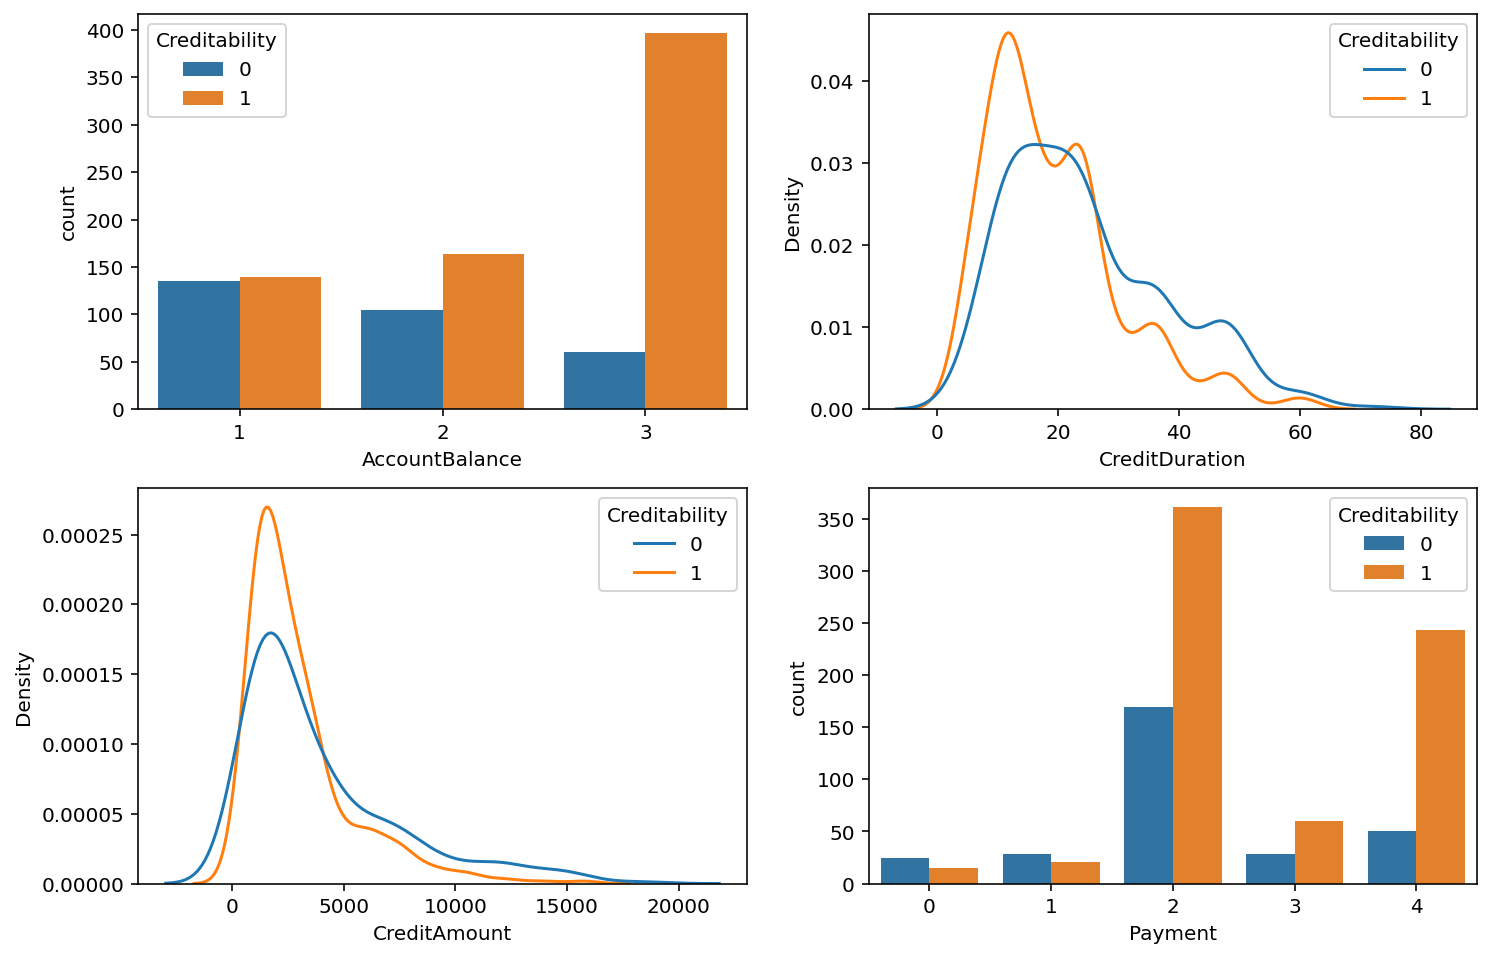

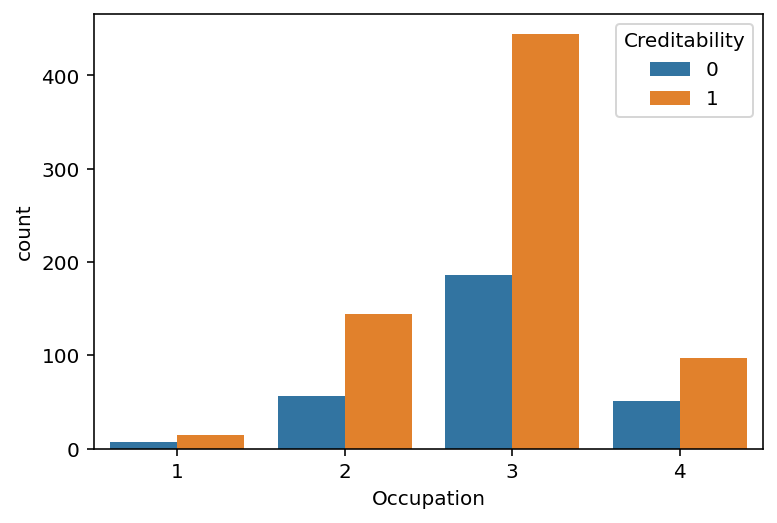

In [127]:
# Creditability와의 상관관계 파악(시각화)
plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
sns.countplot(data=data, x=Balance, hue=target)
plt.subplot(2,2,2)
sns.kdeplot(data=data, x=Duration, hue=target, common_norm=False)
plt.subplot(2,2,3)
sns.kdeplot(data=data, x=Amount, hue=target, common_norm=False)
plt.subplot(2,2,4)
sns.countplot(data=data, x=Payment, hue=target)
plt.show()

# 시각화(2)
sns.countplot(data=data, x=Job, hue=target)
plt.show()

- (의견) 대출 기간이 20개월 미만일수록, 과거 대출 기록이 좋을수록, 대출 금액이 5000달러 미만일수록, 계좌에 보유한 금액이 높을수록 신용도가 더 좋을 것이다.

- (의견) 단순히 한두 번 대출을 상환했다고 신용이 있다고 판단하기는 어렵다.

**7) 이변량 분석(2)**

- AccountBalance, Payment, CreditAmount, CreditDuration, Occupation 간 상관관계 분석

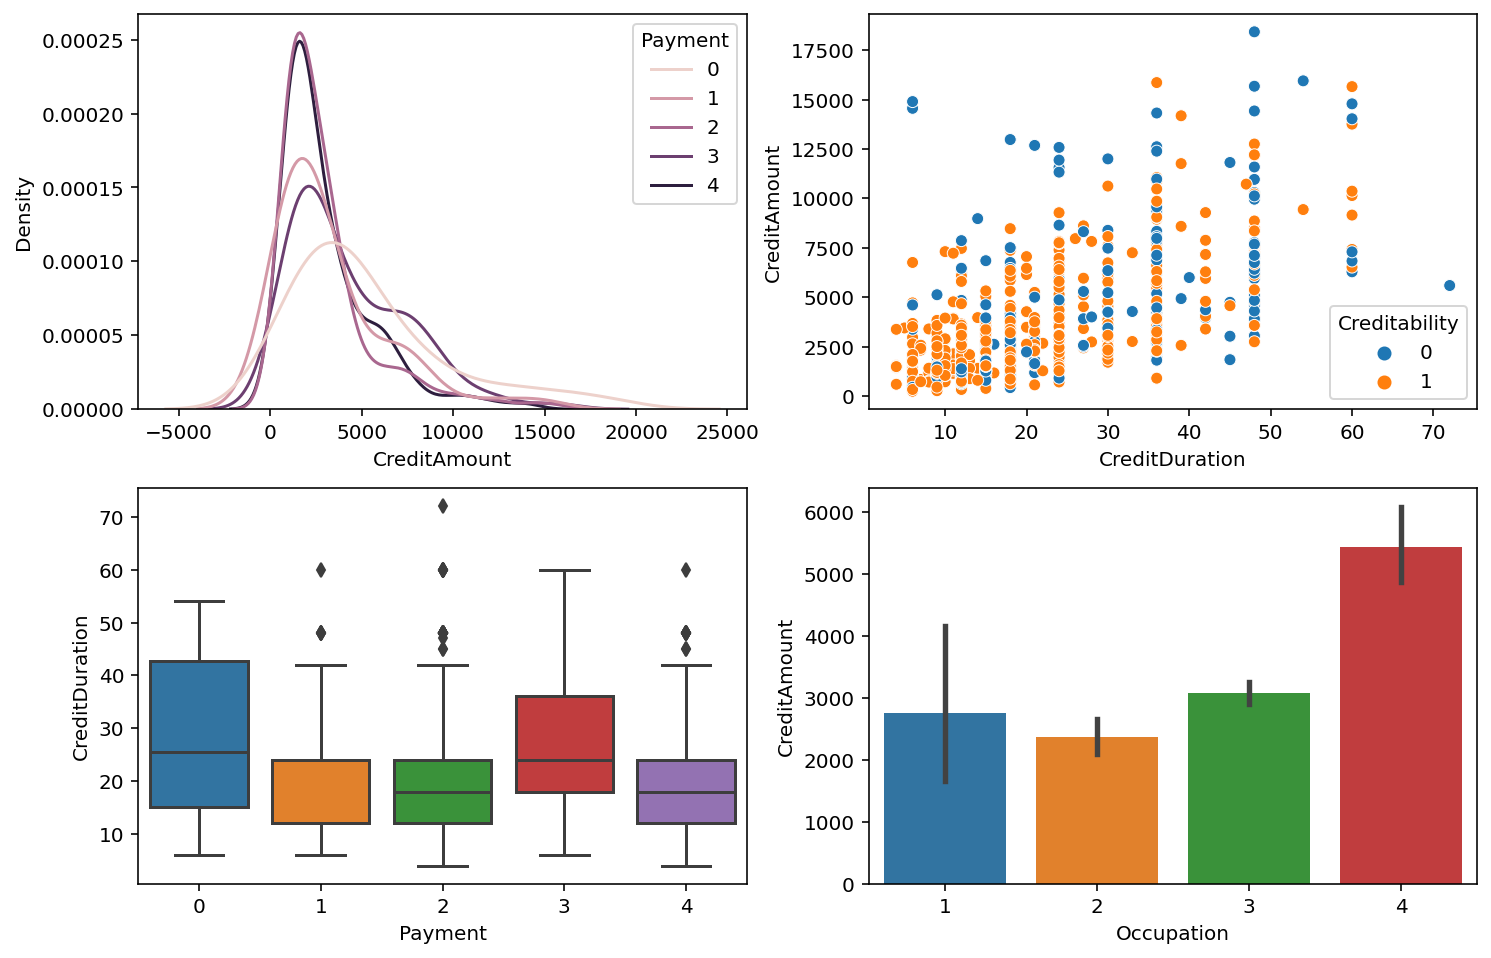

In [128]:
plt.figure(figsize=[12,8])
#  CreditAmount - Payment의 상관관계
plt.subplot(2,2,1)
sns.kdeplot(data=data, x=Amount, hue=Payment, common_norm=False)

# CreditAmount - CreditDuration 상관관계
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=Duration, y=Amount, hue=target)

# Payment - CreditDuration 상관관계
plt.subplot(2,2,3)
sns.boxplot(data=data, y=Duration, x=Payment)

# Occupation - CreditAmount 상관관계
plt.subplot(2,2,4)
sns.barplot(data=data, x=Job, y=Amount)
plt.show()

- (의견) 대출 기간이 길면서(40개월 이상) 신청 금액이 높은 경우(약 8천달러 이상) 상환하지 못할 가능성이 굉장히 높아질 것이다.
- (의견) 은행 계좌와 대출 신청금액은 큰 상관관계는 없는 것 같다.
- (의견) 직업이 안정적인 사람들이 신청금액이 높았는데, 이런 사람들이 신용이 나쁠 것 같지는 않다.
- (의견) 현재 신용에 문제가 없는 사람들은 대출 기간이 길어도 문제가 없어 보인다.

**8) 추가**

- 내용

- (의견)
- (의견)

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- Age 변수에 대한 결측치 처리를 진행합니다.
- 데이터 양이 많지 않으니 제거 보다는 채우기를 권고합니다.

In [129]:
# 결측치를 연령 평균으로 채우기
data[Age].fillna(data[Age].median(), inplace=True)

# 확인
data.isnull().sum()

Creditability     0
AccountBalance    0
CreditDuration    0
Payment           0
Purpose           0
CreditAmount      0
Employment        0
SexMarital        0
CurrentAddress    0
MostValuable      0
Age               0
ApartmentType     0
NoCredits         0
Occupation        0
Telephone         0
ForeignWorker     0
dtype: int64

* 설명 : 평균으로 채우기에는 연령대가 젊은 사람 위주로 몰려 있어서, 중위값으로 채우기로 결정

**2) x, y 분리**

- Target을 선정하고 x, y를 분리합니다.

In [130]:
# target 선언
target = 'Creditability'

# x, y 분리
x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

- 앞에서 범주형으로 구분한 변수에 대해 가변수화를 수행합니다.
- 참고: 이미 x, y로 분리가 되었으니 x에 대한 가변수화를 수행해야 합니다.


In [131]:
# x값 가변수화
x = pd.get_dummies(x, columns=[Balance, Payment, Purpose, Employstatus, Marry, Livelong, Valuable,
                            Apartment, Credits, Job, Phone, Foreigner], drop_first=True)

# 가변수화 잘 되었는지 확인
x.head()

,CreditDuration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Purpose_1,...,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2,ForeignWorker_2
0,24,1249,28.0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,9,276,22.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,18,1049,21.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,24,6419,33.0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,1,0
4,12,1424,55.0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


**4) 정규화**

- 앞에서 연속형으로 구분한 변수에 대해 정규화를 진행합니다.

In [132]:
# 정규화
x[Duration] = (x[Duration] - x[Duration].min()) / (x[Duration].max() - x[Duration].min())
x[Amount] = (x[Amount] - x[Amount].min()) / (x[Amount].max() - x[Amount].min())
x[Age] = (x[Age] - x[Age].min()) / (x[Age].max() - x[Age].min())

# 확인
x.head()

,CreditDuration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Purpose_1,...,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2,ForeignWorker_2
0,0.294118,0.054969,0.160714,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.073529,0.001431,0.053571,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.205882,0.043964,0.035714,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.294118,0.339441,0.250000,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,1,0
4,0.117647,0.064598,0.642857,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


**5) 학습용, 평가용 데이터 분리**


- 모델링을 위해 학습용, 평가용 데이터를 분리합니다.

In [136]:
# 필요 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 훈련용/학습용 분리 (7:3 비율, random state=2022)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 다음 알고리즘을 사용해 모델링을 진행합니다.
    - Logistic Regression
    - KNN
    - Decision Tree
    - Random Forest
    - XGBoost
- Classification Report를 사용해 성능을 평가합니다.
- 성능 평가 결과 아래에 성능에 대한 의견을 정리합니다.
- 혼동행렬, 변수 중요도 등을 시각화해 모델을 심도있게 탐색합니다.

## 4.1.Logistic Regression

### 4.1.1.모델링

- Logistic Regression 알고리즘을 사용해 모델링을 진행합니다.

In [87]:
# 필요 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression


In [88]:
# 변수 지정
model = LogisticRegression()

In [89]:
# 모델 학습
model.fit(x_train, y_train)

LogisticRegression()

In [90]:
# 모델 예측
y_pred = model.predict(x_test)

In [93]:
# 평가에 필요한 라이브러리 불러오기
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# 예측 결과 평가
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[ 48  49]
 [ 32 171]]
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        97
           1       0.78      0.84      0.81       203

    accuracy                           0.73       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.72      0.73      0.72       300

Accuracy : 0.73


- (의견) 예상보다 정확하게 예측한 것 같다.
- (의견) 다만 신용 없는 사람들에 대한 정밀도와 민감도가 매우 낮은 것이 문제다. 이 경우 신용도가 낮은 사람에게 위험한 대출을 승인할 가능성이 높다.

- (의견) 오버샘플링을 통해 신용이 없는 사람과 신용이 있는 사람의 비중을 비슷하게 맞춘 후 모델링을 하면 정확도가 더 높아질 것 같다.

### 4.1.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) Oversampling**

- Oversampling을 통해 y값의 표본 수 맞추기

In [99]:
# 필요 라이브러리 불러오기
from imblearn.over_sampling import SMOTE

In [100]:
# 오버샘플링 진행 (train 데이터만)
smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x_train, y_train)

In [104]:
# 오버샘플링 확인
y_over.value_counts()

0    497
1    497
Name: Creditability, dtype: int64

In [105]:
# 오버샘플링 데이터를 이용해서 데이터 분리 및 모델 선언 (7:3 분할, random state=2022)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)

# 모델 정의 및 학습
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [106]:
# 모델 예측 및 평가
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[124  28]
 [ 20 127]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       147

    accuracy                           0.84       299
   macro avg       0.84      0.84      0.84       299
weighted avg       0.84      0.84      0.84       299

Accuracy : 0.8394648829431438


- (의견) 예상대로 정밀도와 특이도(신용도가 없는 사람들에 대한 예측)가 크게 올랐다.
- (의견) 정밀도와 특이도가 크게 상승한 만큼 정확도와 민감도도 소폭 상승한 것 같다.

**2) 위의 모델 최적화(RandomizedSearchCV)**

- RandomizedSearchCV를 이용해 오버샘플링 데이터 기반 모델 최적화

In [112]:
# 필요 라이브러리 불러오기
from sklearn.model_selection import RandomizedSearchCV

# 변수 지정
rd_model = LogisticRegression()
rd_params = {'max_iter':range(1,101,10)} # 최적화 범위 : penalty : 1~20

# 모델 정의 및 학습
model = RandomizedSearchCV(rd_model, rd_params, cv=10, n_iter=50, random_state=2022, scoring='accuracy')
model.fit(x_train, y_train)

#모델 예측 및 평가
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[127  25]
 [ 23 124]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       152
           1       0.83      0.84      0.84       147

    accuracy                           0.84       299
   macro avg       0.84      0.84      0.84       299
weighted avg       0.84      0.84      0.84       299

Accuracy : 0.8394648829431438


In [113]:
# 최적 파라미터 조회
model.best_estimator_

LogisticRegression(max_iter=11)

- (의견) 4-1번 모델(오버피팅한 데이터 기반 모델) 대비 민감도와 특이도가 약간 상승했다.
- (의견) max_iter 값이 낮게 나온 것을 보면 정확도를 높이기 위해 전수조사를 할 필요는 없어 보인다(비용 문제).

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘을 사용해 모델링을 진행합니다.

In [137]:
# 필요 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier

In [138]:
# 모델 선언 (max depth=5)
model = DecisionTreeClassifier(max_depth=5)

In [139]:
# 모델 훈련
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [140]:
# 모델 예측
y_pred = model.predict(x_test)

In [141]:
# 모델 평가
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[ 46  51]
 [ 37 166]]
              precision    recall  f1-score   support

           0       0.55      0.47      0.51        97
           1       0.76      0.82      0.79       203

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.70      0.71      0.70       300

Accuracy : 0.7066666666666667


- (의견) 로지스틱회귀 초기 결과처럼 신용 없는 사람들에 대한 정밀도와 민감도가 매우 낮게 나왔다.
- (의견) 전반적으로 로지스틱회귀 모델보다 약간 떨어지는 성능을 보인다.
- (의견) 다만 오버샘플링을 통해 절대적인 데이터 양을 비슷하게 맞추면 해결될 것 같다.

### 4.2.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버샘플링**

- 보다 정확한 모델 예측을 위해 Creditability의 데이터 수를 비슷하게 맞춘다.

In [251]:
# 필요 라이브러리 불러오기
from imblearn.over_sampling import SMOTE

# 오버샘플링 진행 (train 데이터만)
smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x_train, y_train)

# 오버샘플링 확인
y_over.value_counts()

0    497
1    497
Name: Creditability, dtype: int64

In [252]:
# 오버샘플링 데이터를 이용해서 데이터 분리 및 모델 선언 (7:3 분할, random state=2022)
x_Train, x_Test, y_Train, y_Test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)

# 모델 정의 및 학습
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_Train, y_Train)

DecisionTreeClassifier(max_depth=5)

In [207]:
# 모델 예측 및 평가
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[ 51  46]
 [ 66 137]]
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        97
           1       0.75      0.67      0.71       203

    accuracy                           0.63       300
   macro avg       0.59      0.60      0.59       300
weighted avg       0.65      0.63      0.63       300

Accuracy : 0.6266666666666667


- (의견) 전반적인 성능 점수가 오히려 더 감소했다.
- (의견) 의사결정나무 알고리즘 자체가 이 데이터에 어울리지 않는 것 같기도 하다.

**2) RandomizedSearchCV**

- RandomizedSearchCV를 통해 오버샘플링 기반 모델의 성능을 더욱 향상시켜 보기

In [172]:
# 변수 정의
rd_model = DecisionTreeClassifier(random_state=2022)
rd_params = {'max_depth':range(3,21),'min_samples_split':range(2,21,2),'min_samples_leaf':range(3,21)}

# 모델 정의 및 학습
model = RandomizedSearchCV(rd_model, rd_params, cv=10, scoring='accuracy',n_iter=50)
model.fit(x_Train, y_Train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2022),
                   n_iter=50,
                   param_distributions={'max_depth': range(3, 21),
                                        'min_samples_leaf': range(3, 21),
                                        'min_samples_split': range(2, 21, 2)},
                   scoring='accuracy')

In [173]:
# 모델 예측 및 평가
y_Pred = model.predict(x_Test)
print(confusion_matrix(y_Test,y_Pred))
print(classification_report(y_Test,y_Pred))
print('Accuracy :',accuracy_score(y_Test,y_Pred))

[[125  27]
 [ 53  94]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       152
           1       0.78      0.64      0.70       147

    accuracy                           0.73       299
   macro avg       0.74      0.73      0.73       299
weighted avg       0.74      0.73      0.73       299

Accuracy : 0.7324414715719063


**3) 변수 별 가중치 시각화**

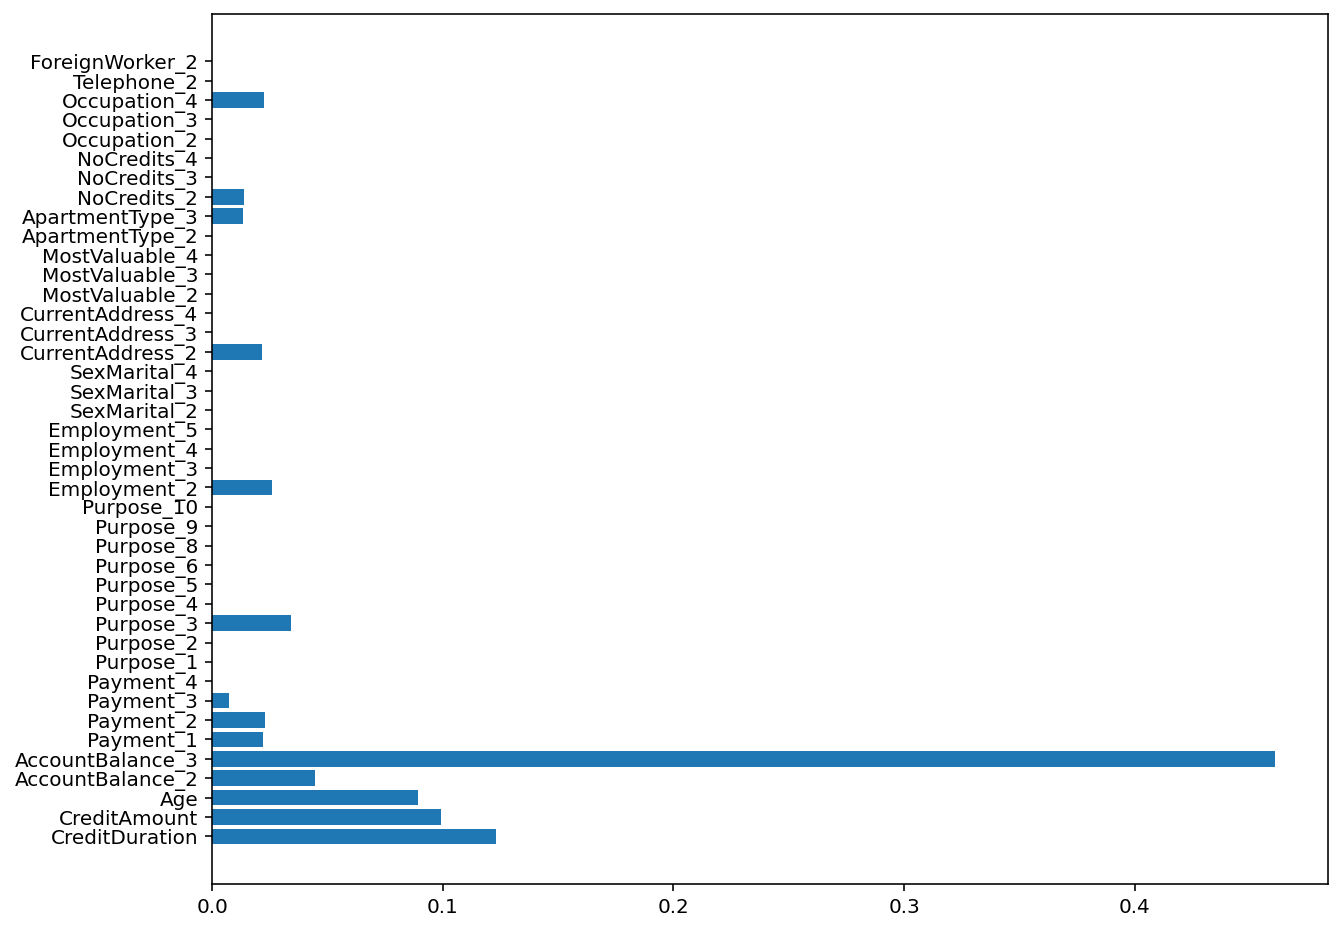

In [256]:
# 오버샘플링 데이터 기반 모델임
plt.figure(figsize=[10,8])
plt.barh(list(x),model.feature_importances_)
plt.show()

- (의견) 전반적인 성능 점수가 크게 상승했다.
- (의견) 다만 신용이 있는 사람들에 대한 민감도가 낮은 점이 아쉽다. 이 경우 신용도가 충분한 고객에 대한 대출을 거부하여 대출 사업의 수익성에 악영향을 줄 수 있다.

## 4.3.KNN

### 4.3.1.모델링

- KNN 알고리즘을 사용해 모델링을 진행합니다.

In [149]:
# 필요 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 모델 선언
model = KNeighborsClassifier(n_neighbors=5)

In [150]:
# 모델 학습
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2022),
                   n_iter=50,
                   param_distributions={'max_depth': range(3, 21),
                                        'min_samples_leaf': range(3, 21),
                                        'min_samples_split': range(2, 21, 2)},
                   scoring='accuracy')

In [151]:
# 모델 예측
y_pred = model.predict(x_test)

In [152]:
# 모델 평가
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[ 32  65]
 [ 33 170]]
              precision    recall  f1-score   support

           0       0.49      0.33      0.40        97
           1       0.72      0.84      0.78       203

    accuracy                           0.67       300
   macro avg       0.61      0.58      0.59       300
weighted avg       0.65      0.67      0.65       300

Accuracy : 0.6733333333333333


- (의견) 신용도가 없는 사람들에 대한 예측 확률이 정말 낮다. 결과를 반대로 출력하게 하는 게 더 나을 것 같다.
- (의견) 다만 민감도가 높은 점은 주목할 만 하다.
- (의견) 오버샘플링이나 성능 튜닝을 통해 정확도와 특이도를 올리면 정말 좋을 것 같다.

### 4.3.2.모델 탐색(1가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버샘플링**

- 오버샘플링한 데이터를 이용해 모델 예측

In [247]:
# 오버샘플링 진행 (train 데이터만)
smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x_train, y_train)

# 오버샘플링 확인
y_over.value_counts()

0    497
1    497
Name: Creditability, dtype: int64

In [248]:
# 오버샘플링 데이터를 이용해서 데이터 분리 및 모델 선언 (7:3 분할, random state=2022)
x_Train, x_Test, y_Train, y_Test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)

# 모델 정의 및 학습
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_Train, y_Train)

KNeighborsClassifier()

In [249]:
# 모델 예측 및 평가
y_Pred = model.predict(x_Test)
print(confusion_matrix(y_Test,y_Pred))
print(classification_report(y_Test,y_Pred))
print('Accuracy :',accuracy_score(y_Test,y_Pred))

[[140  12]
 [ 46 101]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       152
           1       0.89      0.69      0.78       147

    accuracy                           0.81       299
   macro avg       0.82      0.80      0.80       299
weighted avg       0.82      0.81      0.80       299

Accuracy : 0.8060200668896321


- (의견) 예상대로 전반적인 성능이 크게 향상되었다.
- (의견) 다만 민감도가 오히려 떨어지는 문제점이 발생했다.
- (의견) KNN 모델은 신용도가 없는 사람을 예측할 때 유리한 것 같다.

## 4.4.Random Forest

### 4.4.1.모델링

- Random Forest 알고리즘을 사용해 모델링을 진행합니다.

In [156]:
# 필요 라이브러리 불러오기
from sklearn.ensemble import RandomForestClassifier

In [194]:
# 모델 선언 (max depth=5)
model = RandomForestClassifier(max_depth=5)

In [195]:
# 모델 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [196]:
# 모델 예측
y_pred = model.predict(x_test)

In [197]:
# 모델 평가
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[ 10  87]
 [  9 194]]
              precision    recall  f1-score   support

           0       0.53      0.10      0.17        97
           1       0.69      0.96      0.80       203

    accuracy                           0.68       300
   macro avg       0.61      0.53      0.49       300
weighted avg       0.64      0.68      0.60       300

Accuracy : 0.68


- (의견) 의사결정나무 모델과 마찬가지로 신용도가 있는 사람들에 대한 예측 확률은 높은데 신용도가 없는 사람들에 대한 예측 확률은 낮다.
- (의견) 신용도가 높은 사람들은 잘 예측하는 반면, 신용도가 없는 사람에게는 그렇지 않다.

### 4.4.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버샘플링**

- 동일한 모델(Random Forest)에 대하여 오버샘플링한 데이터를 기반으로 재예측

In [262]:
# 오버샘플링 진행 (train 데이터만)
smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x_train, y_train)

# 오버샘플링 확인
y_over.value_counts()

0    497
1    497
Name: Creditability, dtype: int64

In [263]:
# 오버샘플링 데이터를 이용해서 데이터 분리 및 모델 선언 (7:3 분할, random state=2022)
x_Train, x_Test, y_Train, y_Test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)

# 모델 정의 및 학습
model = RandomForestClassifier(max_depth=5)
model.fit(x_Train, y_Train)

RandomForestClassifier(max_depth=5)

In [264]:
# 모델 예측 및 평가
y_Pred = model.predict(x_Test)
print(confusion_matrix(y_Test,y_Pred))
print(classification_report(y_Test,y_Pred))
print('Accuracy :',accuracy_score(y_Test,y_Pred))

[[127  25]
 [ 30 117]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       152
           1       0.82      0.80      0.81       147

    accuracy                           0.82       299
   macro avg       0.82      0.82      0.82       299
weighted avg       0.82      0.82      0.82       299

Accuracy : 0.8160535117056856


- (의견) 민감도가 약간 감소하긴 했지만 전반적인 성능 점수가 크게 향상되었다.
- (의견) 이 모델은 신용도가 있는 사람을 예측할 때 유리할 것 같다.

**2) 오버셈플링 데이터 모델 기반 튜닝**

- 오버샘플링한 데이터를 기반으로 예측한 모델 최적화

In [219]:
# 변수 정의
rd_model = RandomForestClassifier(random_state=2022)
rd_params = {'max_depth':range(3,21,3)}

# 모델 정의 및 학습
model = RandomizedSearchCV(rd_model, rd_params, cv=10, scoring='accuracy',n_iter=50)
model.fit(x_Train, y_Train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2022),
                   n_iter=50,
                   param_distributions={'max_depth': range(3, 21, 3)},
                   scoring='accuracy')

In [220]:
# 모델 예측 및 평가
y_Pred = model.predict(x_Test)
print(confusion_matrix(y_Test,y_Pred))
print(classification_report(y_Test,y_Pred))
print('Accuracy :',accuracy_score(y_Test,y_Pred))

[[131  21]
 [ 22 125]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       152
           1       0.86      0.85      0.85       147

    accuracy                           0.86       299
   macro avg       0.86      0.86      0.86       299
weighted avg       0.86      0.86      0.86       299

Accuracy : 0.8561872909698997


- (의견) 튜닝 시 전반적인 성능 점수가 향상된 점은 고무적이다.
- (의견) 이 모델은 위의 모델들보다 범용적으로 활용할 수 있을 것 같다.

**3) 변수 별 가중치 시각화**

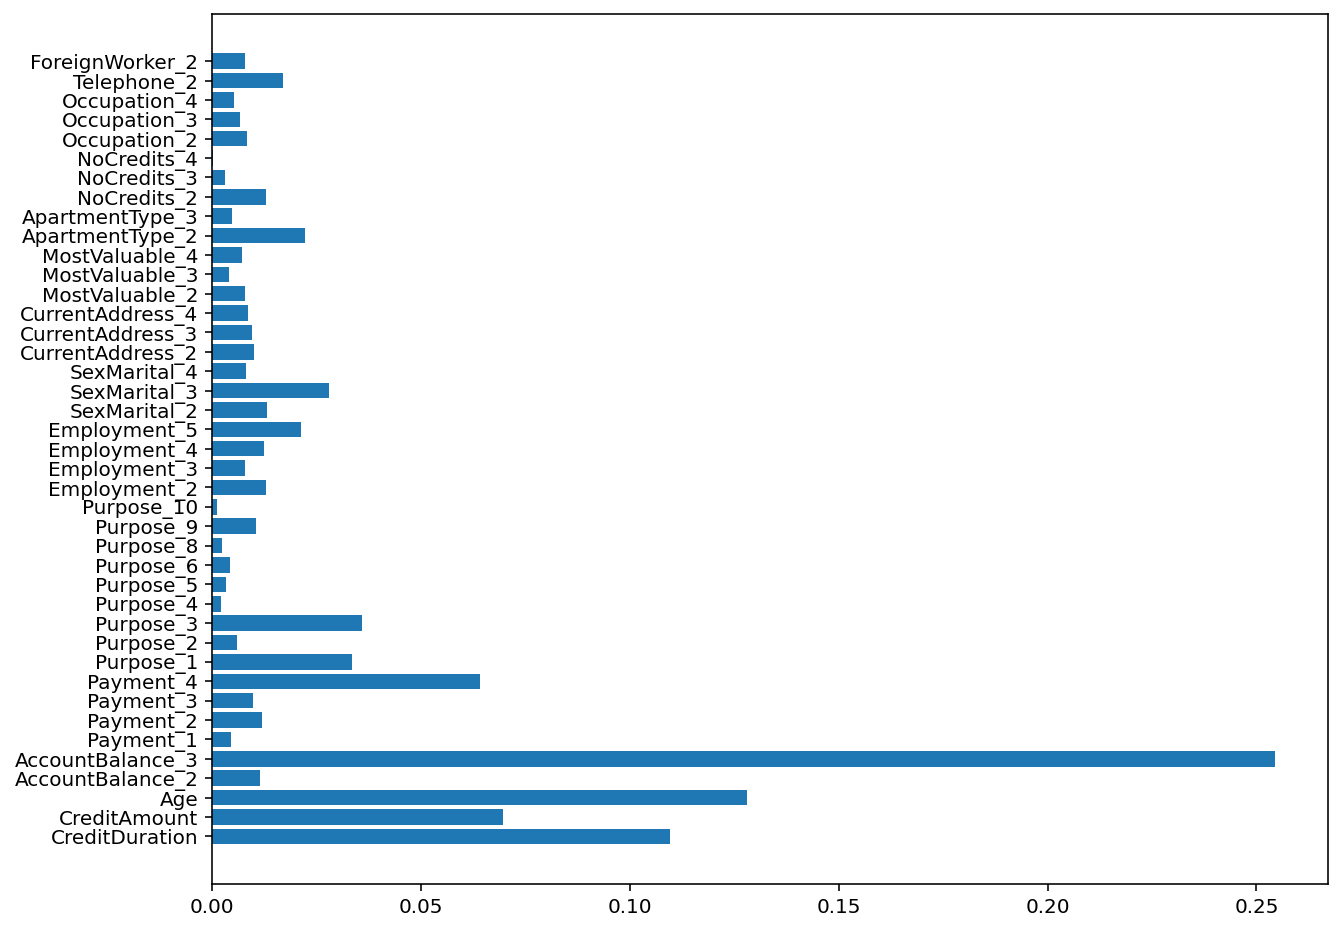

In [265]:
# 오버샘플링 데이터 기반 모델임
plt.figure(figsize=[10,8])
plt.barh(list(x),model.feature_importances_)
plt.show()

## 4.5.XGBoost

### 4.5.1.모델링

- XGBoost 알고리즘을 사용해 모델링을 진행합니다.

In [214]:
# 필요 라이브러리 불러오기
from xgboost import XGBClassifier

In [215]:
# 모델 선언
model = XGBClassifier(random_state=2022)

In [216]:
# 모델 학습
model.fit(x_train, y_train)

[11:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [217]:
# 모델 예측
y_pred = model.predict(x_test)

In [218]:
# 모델 평가
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[ 50  47]
 [ 37 166]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        97
           1       0.78      0.82      0.80       203

    accuracy                           0.72       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.71      0.72      0.72       300

Accuracy : 0.72


- (의견) 기본 모델 기준 신용도가 없는 사람들에 대한 예측이 높게 나왔다.
- (의견) XG부스트 알고리즘은 알고리즘 특성 상 틀렸을 때의 변수에 민감하게 반응해서 그런 것 같다.
- (의견) 오버샘플링 및 튜닝했을 때의 예후가 다른 알고리즘들보다 좋다.

### 4.5.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버샘플링**

- 오버샘플링한 데이터를 기반으로 모델 재학습 및 재예측

In [257]:
# 오버샘플링 진행 (train 데이터만)
smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x_train, y_train)

# 오버샘플링 확인
y_over.value_counts()

0    497
1    497
Name: Creditability, dtype: int64

In [258]:
# 오버샘플링 데이터를 이용해서 데이터 분리 및 모델 선언 (7:3 분할, random state=2022)
x_Train, x_Test, y_Train, y_Test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)

# 모델 정의 및 학습
model = XGBClassifier(random_state=2022)
model.fit(x_Train, y_Train)

[12:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [259]:
# 모델 예측 및 평가
y_Pred = model.predict(x_Test)
print(confusion_matrix(y_Test,y_Pred))
print(classification_report(y_Test,y_Pred))
print('Accuracy :',accuracy_score(y_Test,y_Pred))

[[126  26]
 [ 32 115]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       152
           1       0.82      0.78      0.80       147

    accuracy                           0.81       299
   macro avg       0.81      0.81      0.81       299
weighted avg       0.81      0.81      0.81       299

Accuracy : 0.8060200668896321


- (의견) 민감도가 0.8에 못미치는 것이 아쉽지만 전반적인 성능이 대폭 향상되었다.
- (의견) 추가적인 튜닝 과정을 거치면 범용적으로 쓸 수 있을 것 같다.

**2) 오버샘플링 기반 모델 최적화**

- 오버샘플링 데이터를 기반으로 생성한 모델의 성능 최적화

In [266]:
# 변수 정의
rd_model = XGBClassifier(random_state=2022)
rd_params = {'max_depth':range(3,16,3)}

# 모델 정의 및 학습
model = RandomizedSearchCV(rd_model, rd_params, cv=10, scoring='accuracy',n_iter=50)
model.fit(x_Train, y_Train)

[15:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                    

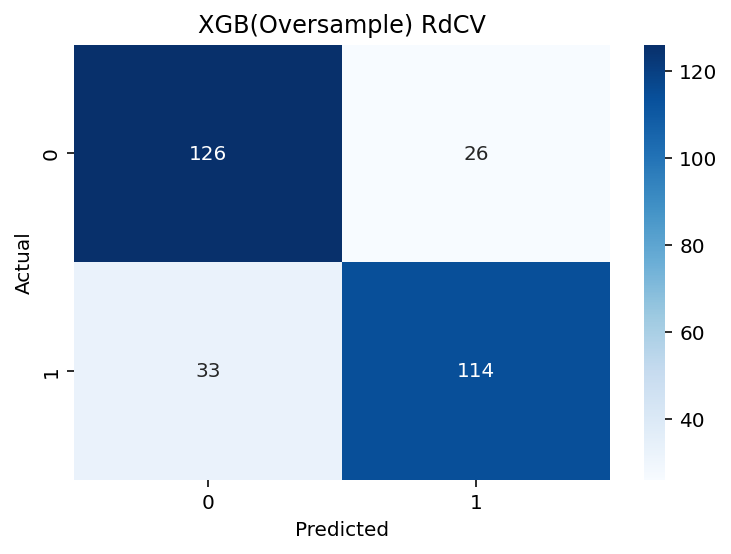

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       152
           1       0.81      0.78      0.79       147

    accuracy                           0.80       299
   macro avg       0.80      0.80      0.80       299
weighted avg       0.80      0.80      0.80       299

Accuracy : 0.802675585284281


In [268]:
# 모델 예측 및 평가
y_Pred = model.predict(x_Test)
sns.heatmap(confusion_matrix(y_Test,y_Pred),annot=True, fmt='g', cmap='Blues')
plt.title('XGB(Oversample) RdCV')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_Test,y_Pred))
print('Accuracy :',accuracy_score(y_Test,y_Pred))

**3) 변수 별 가중치 시각화**

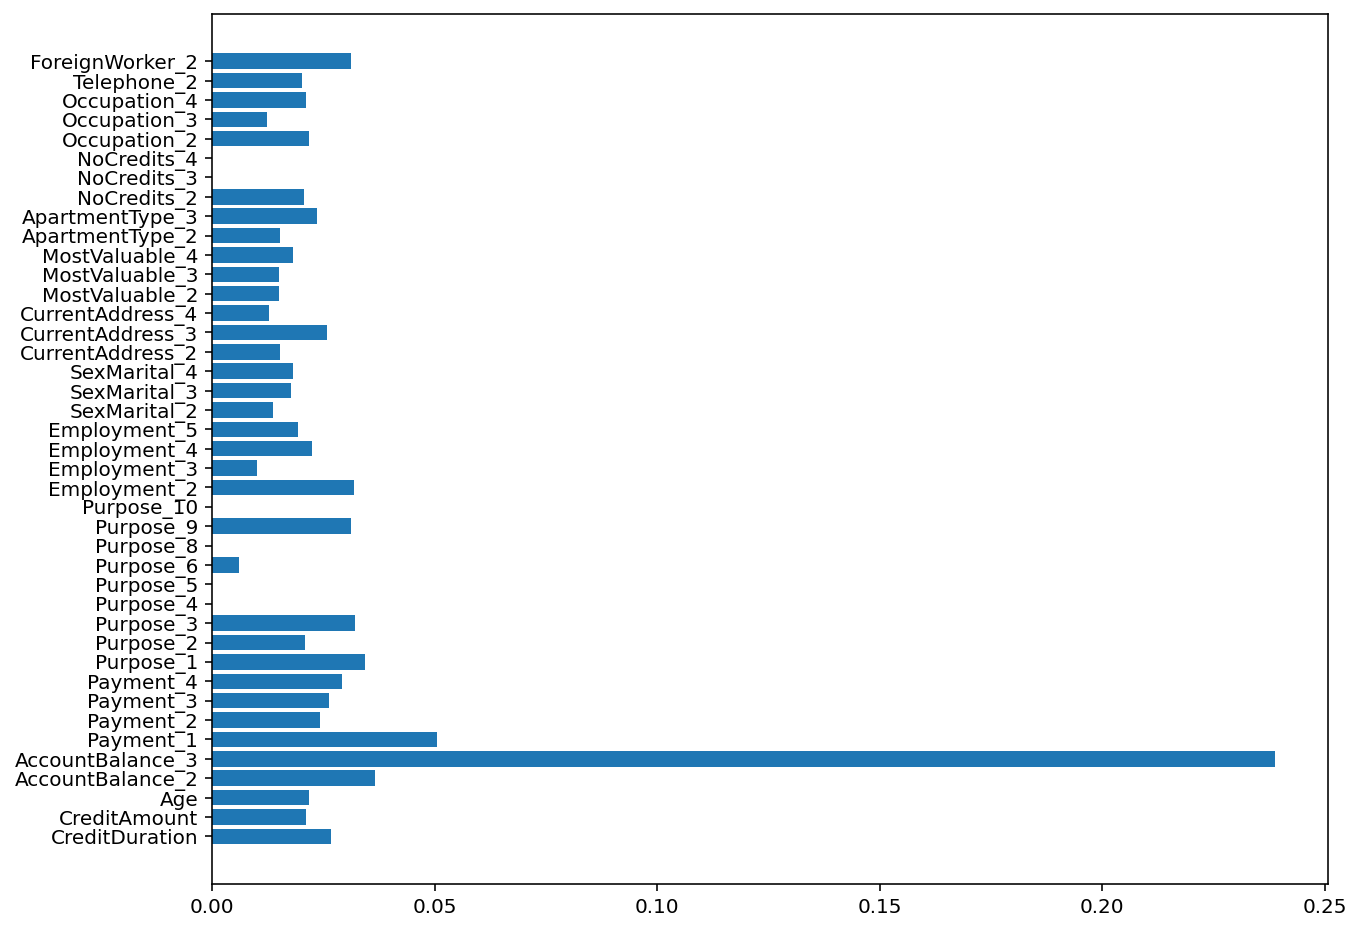

In [261]:
# 오버샘플링 데이터 기반 모델임
plt.figure(figsize=[10,8])
plt.barh(list(x),model.feature_importances_)
plt.show()

- (의견) 정확도가 0.01 상승하긴 했지만 성능이 좋아졌다고 판단하기는 힘들다.
- (의견) XGBoost는 오버샘플링만 해 줘도 제 성능이 나오는 것 같다.

# 5.모델 성능 비교 및 정리

- (의견) 로지스틱회귀, XGBoost, RandomForest는 범용적으로 쓸 수 있는 가능성을 발견했다.
- (의견) 의사결정나무는 상대적으로 신용도 없는 사람을 판별할 때 유리한 모습을 보였다.
- (의견) KNN은 신용도가 있는 사람을 판별할 때 유리한 모습을 보였다.
- (의견) 전반적인 성능 점수는 XGBoost와 RandomForest가 높았으며, 의사결정나무는 다른 모델들 대비 대체로 저조한 점수를 보였다.
- (의견) 데이터 사이즈(개수) 차이가 많이 나면 성능 튜닝보다는 오버샘플링 등의 과정을 통해 비슷한 수로 맞춰주는 것이 훨씬 중요했다.

# 6.성능 튜닝(1개 이상)

- 특정 알고리즘의 모델을 튜닝 대상으로 정하고 나름의 방법으로 모델 성능을 높여봅니다.

## 6.1.KNN 튜닝

### 6.1.1.튜닝

In [237]:
# KNN 모델 RandomizedSearchCV로 튜닝
rm_model = KNeighborsClassifier()
rm_params = {'n_neighbors':range(4,26)}

In [238]:
# 모델 정의
model = RandomizedSearchCV(rm_model, rm_params, n_iter=50, scoring='accuracy', random_state=2022, cv=10)

In [239]:
# 모델 학습
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'n_neighbors': range(4, 26)},
                   random_state=2022, scoring='accuracy')

In [240]:
# 모델 예측
y_pred = model.predict(x_test)

In [241]:
# 모델 평가
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

[[ 31  66]
 [ 30 173]]
              precision    recall  f1-score   support

           0       0.51      0.32      0.39        97
           1       0.72      0.85      0.78       203

    accuracy                           0.68       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.65      0.68      0.66       300

Accuracy : 0.68


- (의견) 성능 점수가 약간 상승하긴 했지만 상승폭이 크지는 않다.
- (의견) 데이터 표본 개수의 균형을 맞추는 것이 성능 튜닝보다 훨씬 중요하다.

### 6.1.2.튜닝 결과

- (의견) 전반적인 성능 점수들이 약간 상승했지만 상승폭이 미미했다(0.02 이하)
- (의견) 특히 신용이 없는 사람들에 대한 예측 점수가 낮은 점이 문제였는데 이 문제점이 거의 개선되지 않았다.
- (의견) 데이터 표본 수가 많이 차이 나다 보니까(2배 이상) 성능 튜닝만으로 정확도를 올리는 데는 한계가 있는 것 같다.

## 6.2.XGBoost 튜닝

### 6.2.1.튜닝

In [269]:
# XGBoost RandomizedSearchCV로 튜닝
rm_model = XGBClassifier()
rm_params = {'max_depth':range(3,16)}

In [270]:
# 모델 정의
model = RandomizedSearchCV(rm_model, rm_params, n_iter=50, scoring='accuracy', random_state=2022, cv=10)

In [271]:
# 모델 학습
model.fit(x_train, y_train)

[15:28:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                    

In [272]:
# 모델 예측
y_pred = model.predict(x_test)

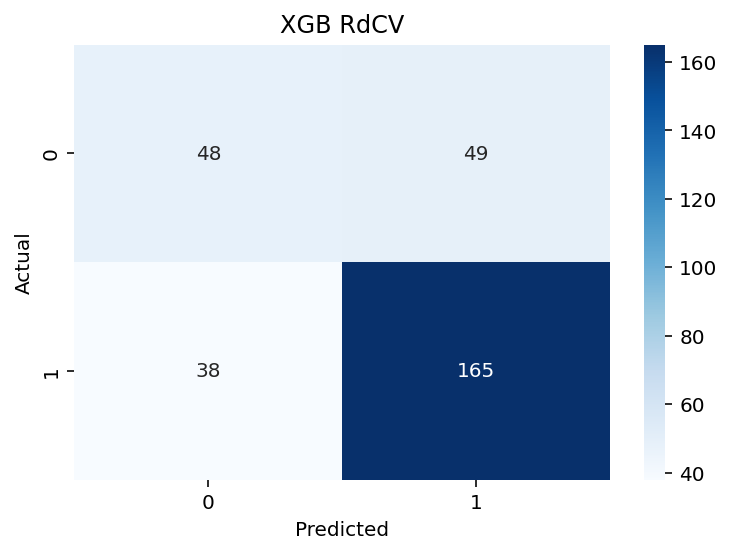

              precision    recall  f1-score   support

           0       0.56      0.49      0.52        97
           1       0.77      0.81      0.79       203

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.66       300
weighted avg       0.70      0.71      0.71       300

Accuracy : 0.71


In [273]:
# 모델 평가
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('XGB RdCV')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred))
print('Accuracy :',accuracy_score(y_test,y_pred))

- (의견) XGBoost 모델 자체가 이 데이터를 학습하고 예측하는 데 효과적인 것 같다.
- (의견) 다만 오버샘플링 하지 않은 데이터를 기반으로 학습한 거라 상대적으로 표본이 적은 집단에 대한 예측력은 떨어진다.

### 6.2.2.튜닝 결과

- (의견) KNN 튜닝 결과는 성능 상승치가 미미했다.
- (의견) 반면 XGBoost 튜닝 결과는 튜닝 전후로 상당한 성능 개선이 있었다.
- (의견) 데이터 수가 불균형할 때는 틀렸을 때의 가중치를 높게 설정하는 (병렬 처리) 알고리즘이 더 적절해 보인다.

# 7.종합 정리

- (의견) 성능 점수를 올리기에는 효과적인 튜닝 메서드를 이용하는 것뿐만 아니라 주어진 데이터를 효과적으로 조율하는 것도 중요하다.
- (의견) 정확도를 올리는 데만 집중하면 심각한 비즈니스 문제가 생길 수 있다(대출해 줘도 되는 고객에게 대출을 안 해주거나, 대출해 주면 안 되는 고객에게 대출을 해서 손실이 생기는 등).

- (의견) 모델 별로 최적화된 분야가 다르니까 여러 가지 모델들을 결합해서 활용하는 것이 좋아 보인다.
- (의견) 실제 비즈니스에 오늘 실습한 모델들을 반영한다면 데이터 전처리 결과를 기반으로 고객이 신용도가 높을지 낮을지를 판단한 후, 신용도가 낮을 것 같으면 의사결정나무 기반 모델, 신용도가 높으면 KNN 기반 모델을 통해 예측하는 것이 좋아 보인다.

- (의견) 다만 프로세스를 세분화하지 않고 모든 고객들에 대해서 단일 모델로 일괄적으로 처리하고자 한다면 XGBoost 기반 모델을 사용하는 것이 적절하다.